In [1]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa import ar_model

In [3]:
# statusデータ
status = pd.read_csv('../../../status.csv')

In [4]:
#statusのyear, month, dayを結合してdatetime型に
status['date'] = status['year'].astype(str) + '/' + status['month'].astype(str).str.zfill(2).astype(str) + '/' + status['day'].astype(str).str.zfill(2).astype(str) + '/' + status['hour'].astype(str).str.zfill(2).astype(str)
status['date'] = pd.to_datetime(status['date'], format='%Y/%m/%d/%H', infer_datetime_format=True)
status.head()

,id,year,month,day,hour,station_id,bikes_available,predict,date
0,0,2013,9,1,0,0,11.0,0,2013-09-01 00:00:00
1,1,2013,9,1,1,0,11.0,0,2013-09-01 01:00:00
2,2,2013,9,1,2,0,11.0,0,2013-09-01 02:00:00
3,3,2013,9,1,3,0,11.0,0,2013-09-01 03:00:00
4,4,2013,9,1,4,0,11.0,0,2013-09-01 04:00:00


In [5]:
status_v0 = status[status['station_id'] == 0] 
status_v0 = status_v0[status_v0['date'] < '2013-09-10']
#status_v0 = status_v0.sort_values(status_v0['date'],ascending=True).reset_index(drop=True)

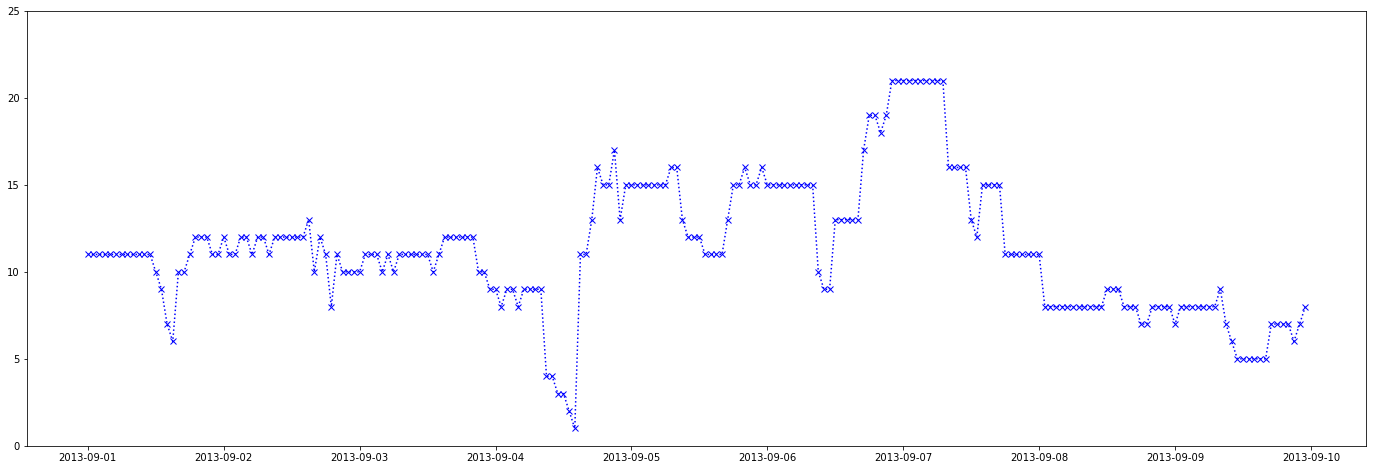

In [6]:
plt.figure(figsize=(24,8))
plt.ylim(0, 25)
plt.plot(status_v0['date'], status_v0['bikes_available'], color = 'blue', marker = 'x', linestyle = ':', label = 'predict')

In [7]:
y = status_v0['bikes_available']
y

0      11.0
1      11.0
2      11.0
3      11.0
4      11.0
       ... 
211     7.0
212     7.0
213     6.0
214     7.0
215     8.0
Name: bikes_available, Length: 216, dtype: float64

In [8]:
from statsmodels.tsa.stattools import adfuller

In [36]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#    rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(window=24).mean()
#    rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(window=24).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [14]:
test_stationarity(y)

AttributeError: module 'pandas' has no attribute 'rolling_mean'

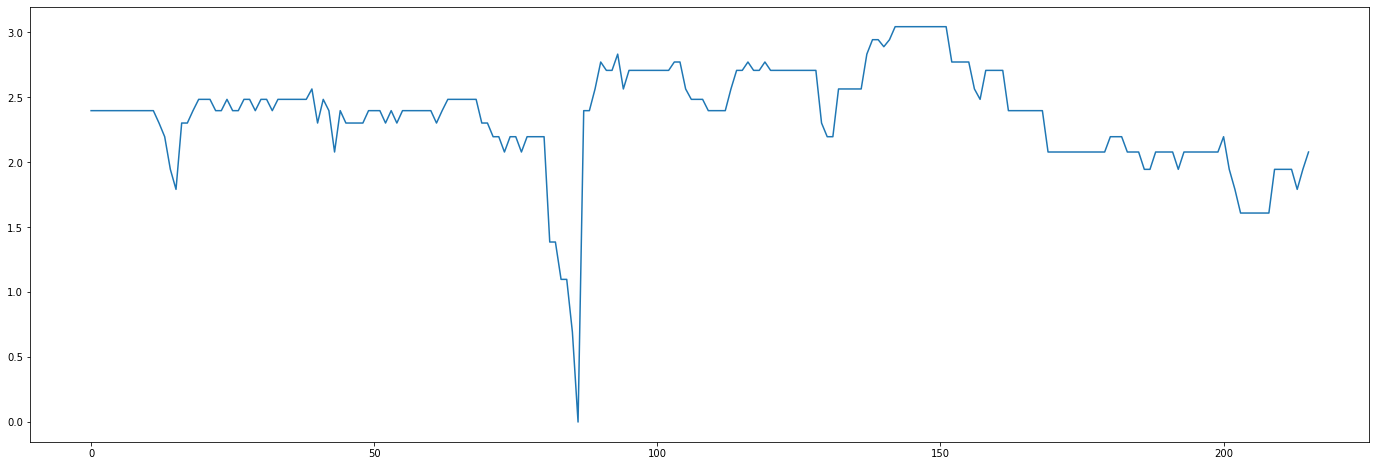

In [10]:
y_log = np.log(y)
plt.figure(figsize=(24,8))
plt.plot(y_log)

In [17]:
Moving_avg = pd.rolling_mean（y、24）
plt.ylim(0, 25)
plt.plot（ts_log）
plt.plot（moving_avg、color = 'red'）

SyntaxError: invalid character in identifier (<ipython-input-17-ce13b1503c80>, line 1)

<AxesSubplot:>

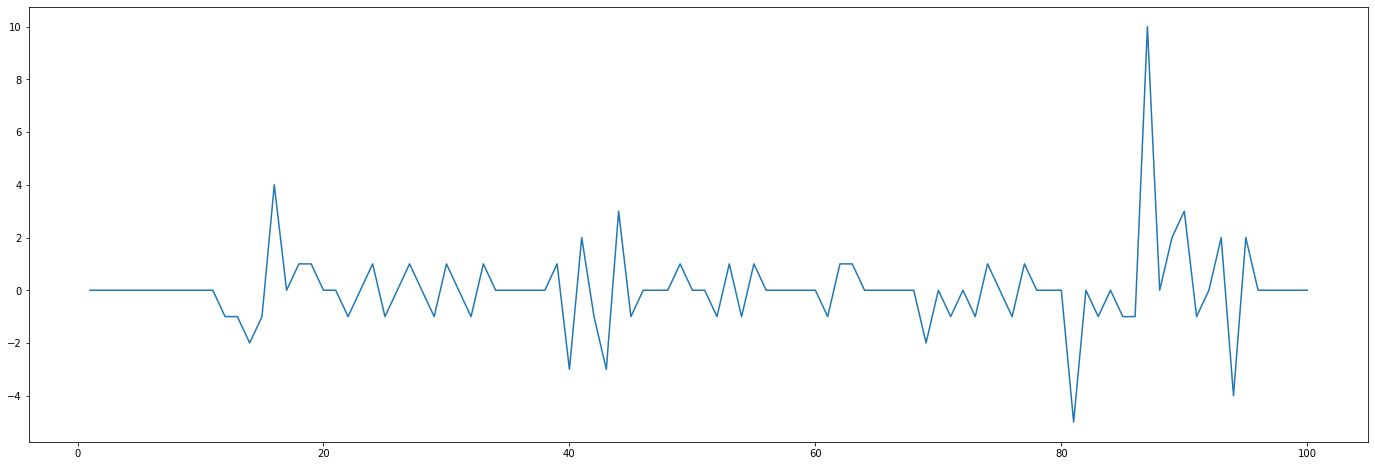

In [11]:
y_diff = y.diff()[:101].dropna()
plt.figure(figsize=(24,8))
y_diff.plot()

In [12]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and wi

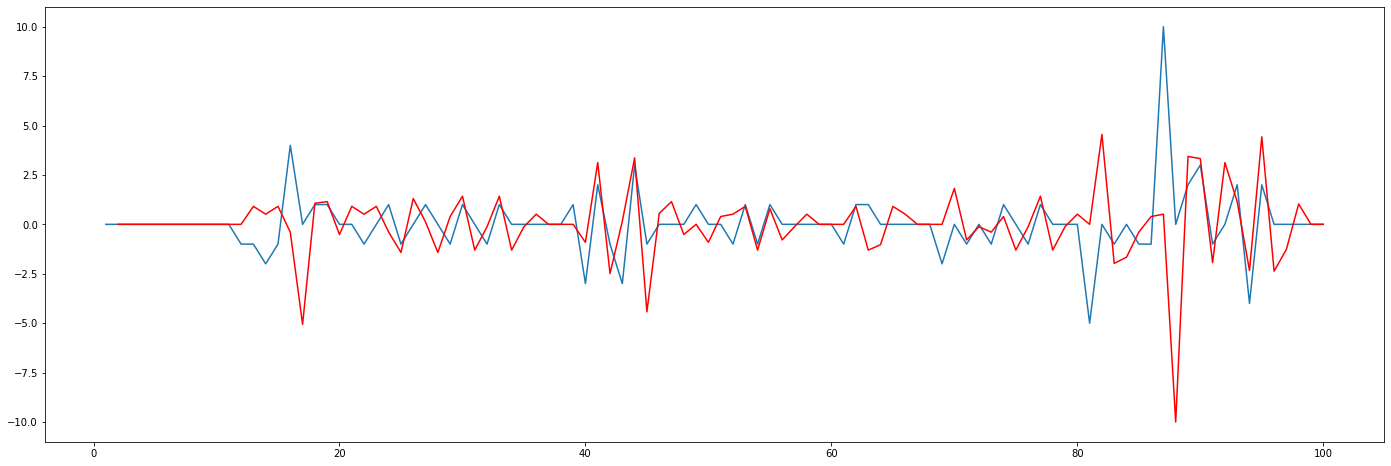

In [14]:
model = ARIMA(y_diff, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(24,8))
plt.plot(y_diff)
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


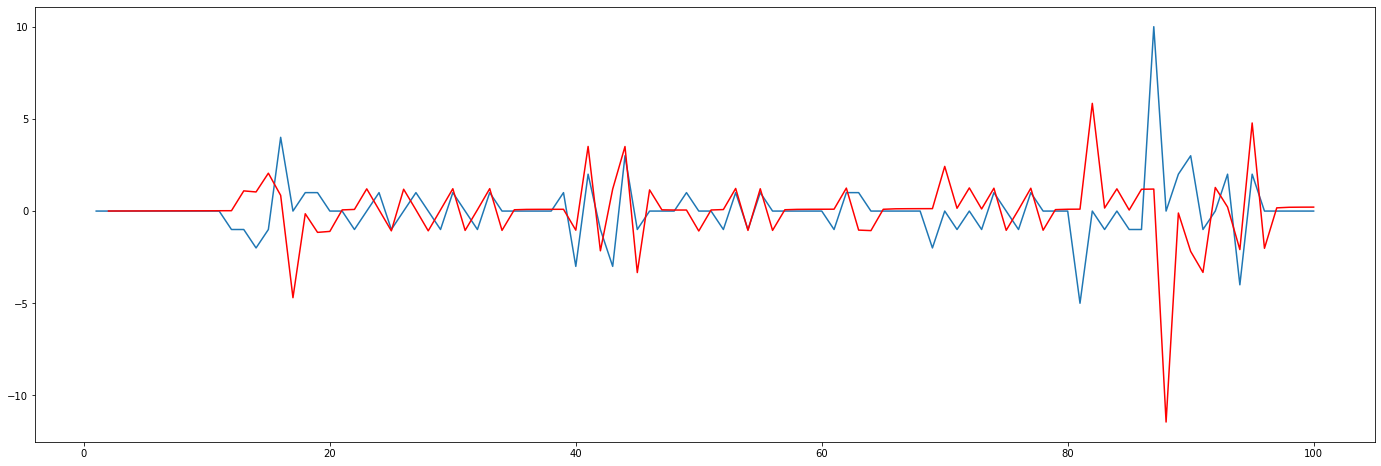

In [16]:
model = ARIMA(y_diff, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(24,8))
plt.plot(y_diff)
plt.plot(results_MA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between

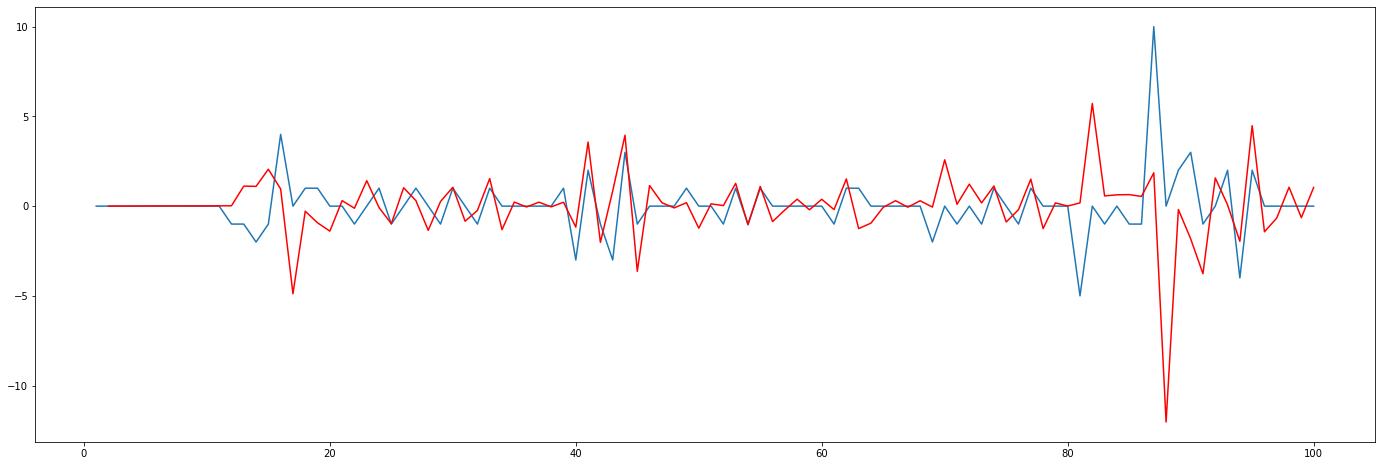

In [17]:
model = ARIMA(y_diff, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.figure(figsize=(24,8))
plt.plot(y_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [19]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

2    0.002587
3    0.004067
4    0.005850
5    0.007156
6    0.009077
dtype: float64


In [21]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

2    0.002587
3    0.006654
4    0.012505
5    0.019661
6    0.028738
dtype: float64


In [22]:
predictions_ARIMA_log = pd.Series(y_diff.ix[0], index=y_diff.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

AttributeError: 'Series' object has no attribute 'ix'

In [23]:
status_v0

,id,year,month,day,hour,station_id,bikes_available,predict,date
0,0,2013,9,1,0,0,11.0,0,2013-09-01 00:00:00
1,1,2013,9,1,1,0,11.0,0,2013-09-01 01:00:00
2,2,2013,9,1,2,0,11.0,0,2013-09-01 02:00:00
3,3,2013,9,1,3,0,11.0,0,2013-09-01 03:00:00
4,4,2013,9,1,4,0,11.0,0,2013-09-01 04:00:00
...,...,...,...,...,...,...,...,...,...
211,211,2013,9,9,19,0,7.0,0,2013-09-09 19:00:00
212,212,2013,9,9,20,0,7.0,0,2013-09-09 20:00:00
213,213,2013,9,9,21,0,6.0,0,2013-09-09 21:00:00
214,214,2013,9,9,22,0,7.0,0,2013-09-09 22:00:00


In [24]:
status_v1 = status_v0.set_index('date')

In [25]:
status_v1

,id,year,month,day,hour,station_id,bikes_available,predict
date,,,,,,,,
2013-09-01 00:00:00,0,2013,9,1,0,0,11.0,0
2013-09-01 01:00:00,1,2013,9,1,1,0,11.0,0
2013-09-01 02:00:00,2,2013,9,1,2,0,11.0,0
2013-09-01 03:00:00,3,2013,9,1,3,0,11.0,0
2013-09-01 04:00:00,4,2013,9,1,4,0,11.0,0
...,...,...,...,...,...,...,...,...
2013-09-09 19:00:00,211,2013,9,9,19,0,7.0,0
2013-09-09 20:00:00,212,2013,9,9,20,0,7.0,0
2013-09-09 21:00:00,213,2013,9,9,21,0,6.0,0


In [26]:
status_date_bike = status_v1['bikes_available']

In [27]:
status_date_bike

date
2013-09-01 00:00:00    11.0
2013-09-01 01:00:00    11.0
2013-09-01 02:00:00    11.0
2013-09-01 03:00:00    11.0
2013-09-01 04:00:00    11.0
                       ... 
2013-09-09 19:00:00     7.0
2013-09-09 20:00:00     7.0
2013-09-09 21:00:00     6.0
2013-09-09 22:00:00     7.0
2013-09-09 23:00:00     8.0
Name: bikes_available, Length: 216, dtype: float64

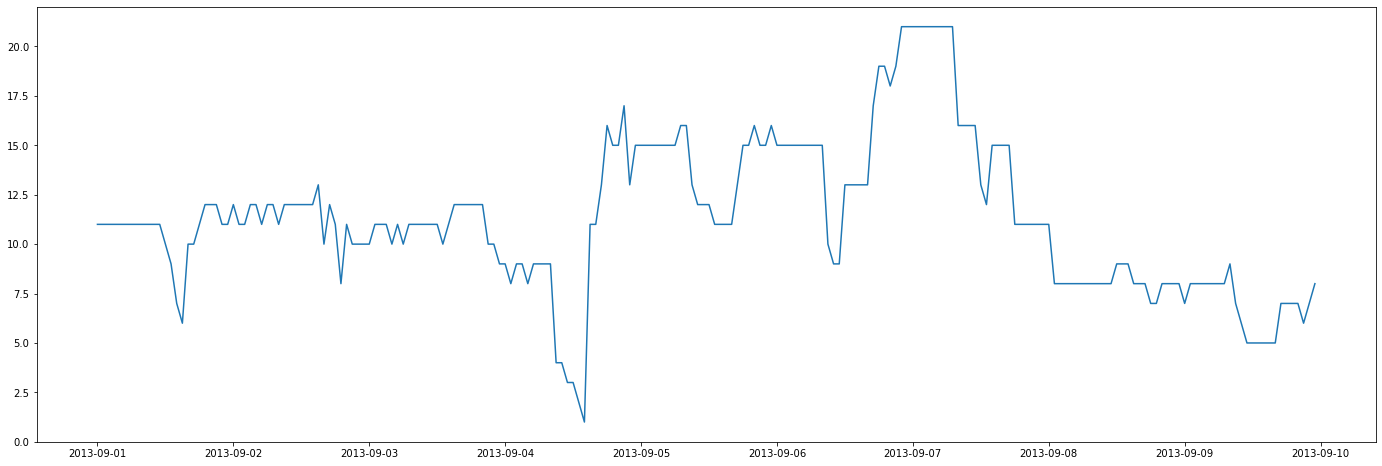

In [28]:
plt.figure(figsize=(24,8))
plt.plot(status_date_bike)

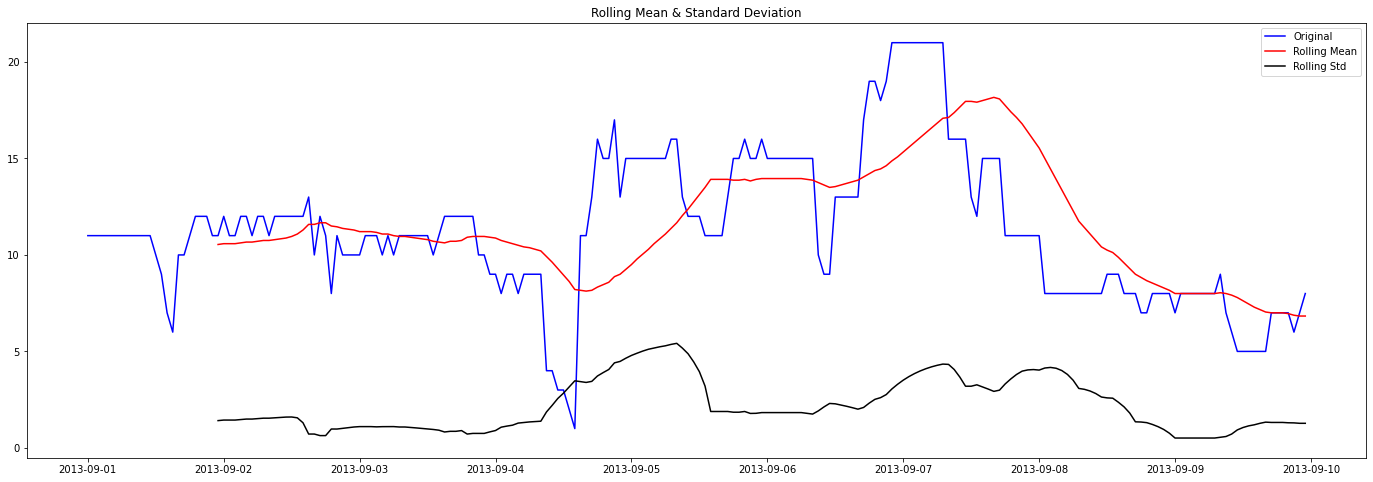

Results of Dickey-Fuller Test:
Test Statistic                  -2.653362
p-value                          0.082462
#Lags Used                       0.000000
Number of Observations Used    215.000000
Critical Value (1%)             -3.461136
Critical Value (5%)             -2.875079
Critical Value (10%)            -2.573986
dtype: float64


In [37]:
plt.figure(figsize=(24,8))
test_stationarity(status_date_bike)

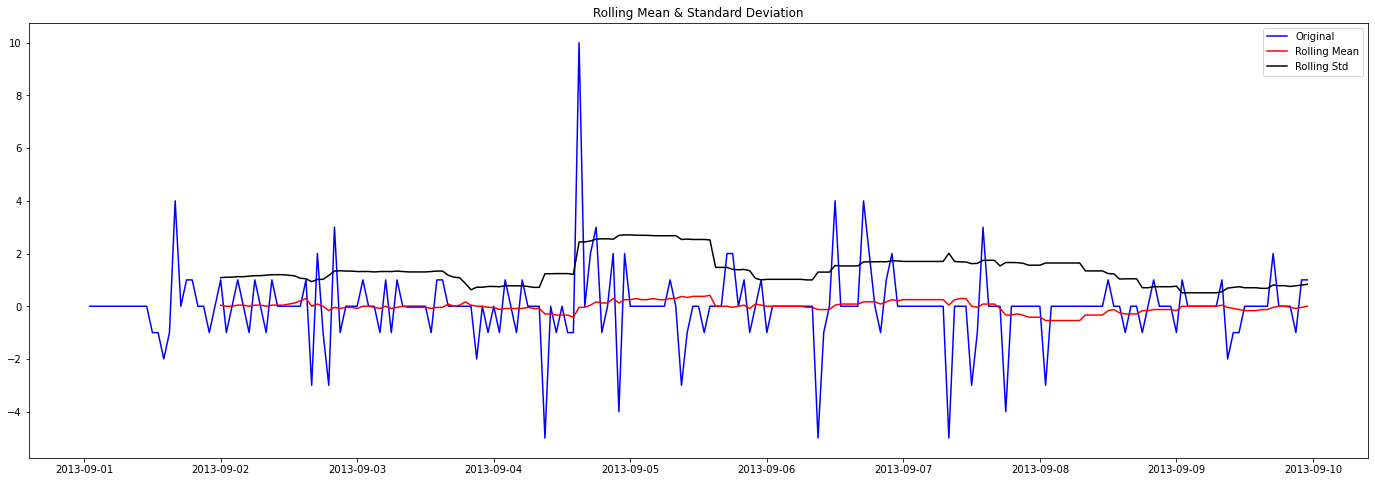

Results of Dickey-Fuller Test:
Test Statistic                -1.556112e+01
p-value                        2.041943e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.140000e+02
Critical Value (1%)           -3.461282e+00
Critical Value (5%)           -2.875143e+00
Critical Value (10%)          -2.574020e+00
dtype: float64


In [43]:
status_date_bike_diff = status_date_bike.diff()
plt.figure(figsize=(24,8))
test_stationarity(status_date_bike_diff.dropna())

In [47]:
status_date_bike_diff.dropna(inplace = True)
status_date_bike_diff

date
2013-09-01 01:00:00    0.0
2013-09-01 02:00:00    0.0
2013-09-01 03:00:00    0.0
2013-09-01 04:00:00    0.0
2013-09-01 05:00:00    0.0
                      ... 
2013-09-09 19:00:00    0.0
2013-09-09 20:00:00    0.0
2013-09-09 21:00:00   -1.0
2013-09-09 22:00:00    1.0
2013-09-09 23:00:00    1.0
Name: bikes_available, Length: 215, dtype: float64

In [45]:
import pandas_profiling as pdp
# 実行
pdp.ProfileReport(status_date_bike_diff)

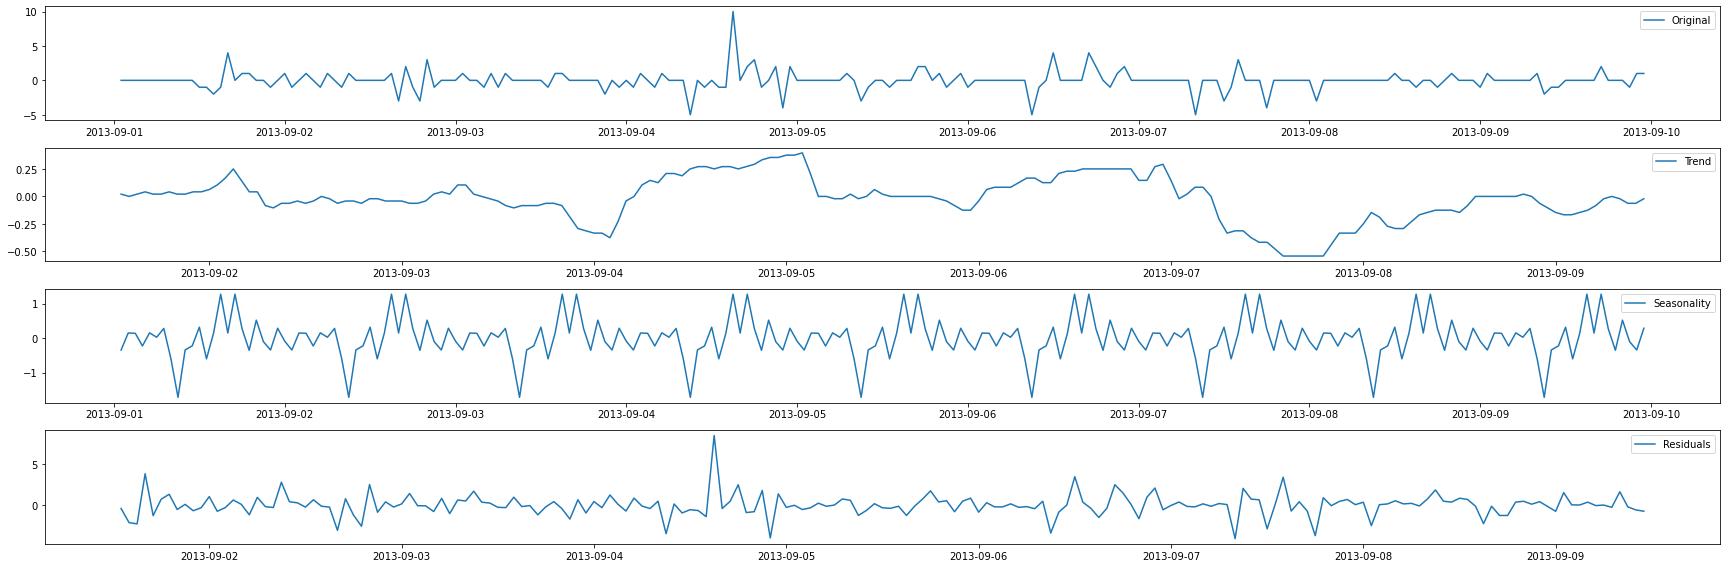

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(status_date_bike_diff)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(24,8))
plt.subplot(411)
plt.plot(status_date_bike_diff, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Results of Dickey-Fuller Test:
Test Statistic                -1.609392e+01
p-value                        5.217575e-29
#Lags Used                     0.000000e+00
Number of Observations Used    1.900000e+02
Critical Value (1%)           -3.465244e+00
Critical Value (5%)           -2.876875e+00
Critical Value (10%)          -2.574945e+00
dtype: float64


<ipython-input-36-e4fc0f697cda>:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show(block=False)


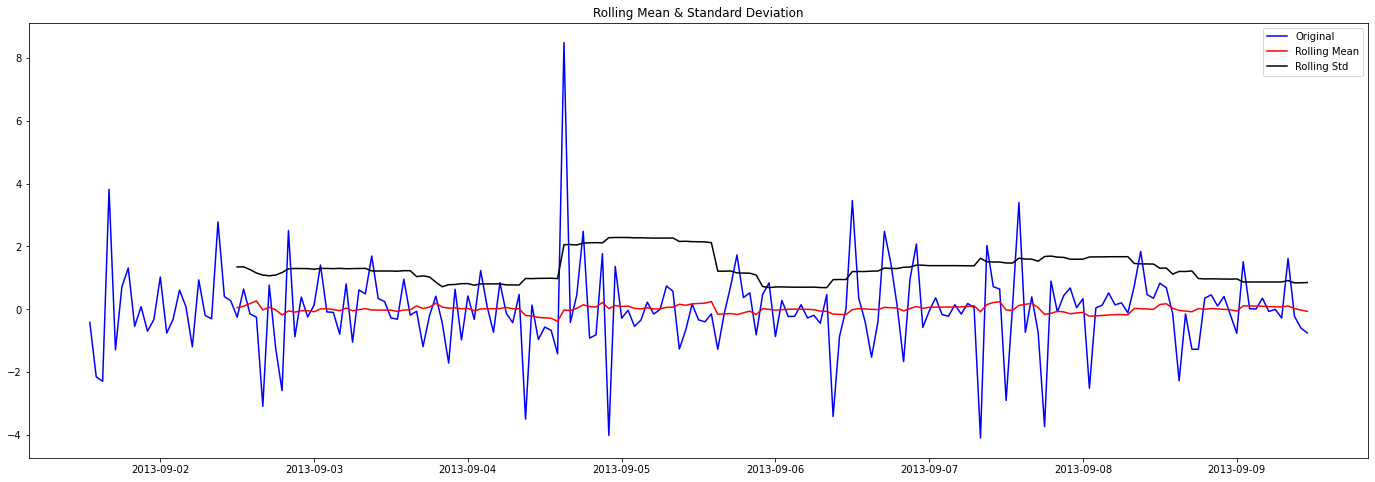

In [51]:
status_date_bike_diff_decompose = residual
status_date_bike_diff_decompose.dropna(inplace=True)
plt.figure(figsize=(24,8))
test_stationarity(status_date_bike_diff_decompose)

In [52]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [53]:
lag_acf = acf(status_date_bike_diff, nlags=20)
lag_pacf = pacf(status_date_bike_diff, nlags=20, method='ols')

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

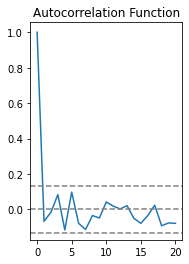

In [54]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(status_date_bike_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(status_date_bike_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

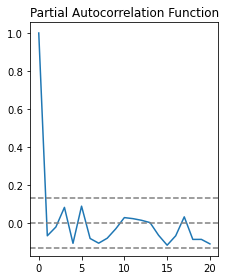

In [55]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(status_date_bike_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(status_date_bike_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, s

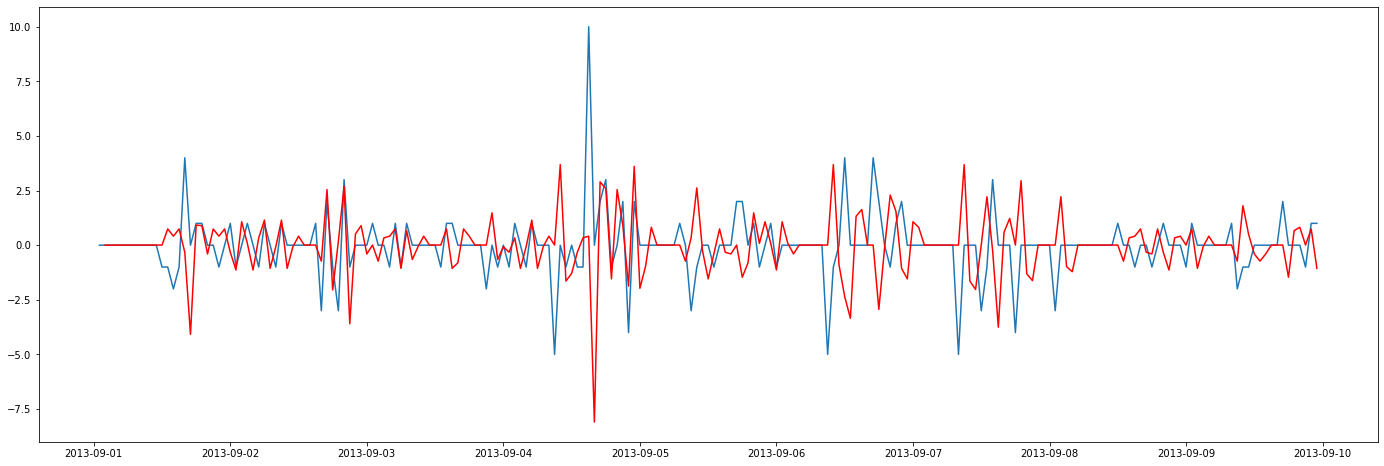

In [56]:
model = ARIMA(status_date_bike_diff, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.figure(figsize=(24,8))
plt.plot(status_date_bike_diff)
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


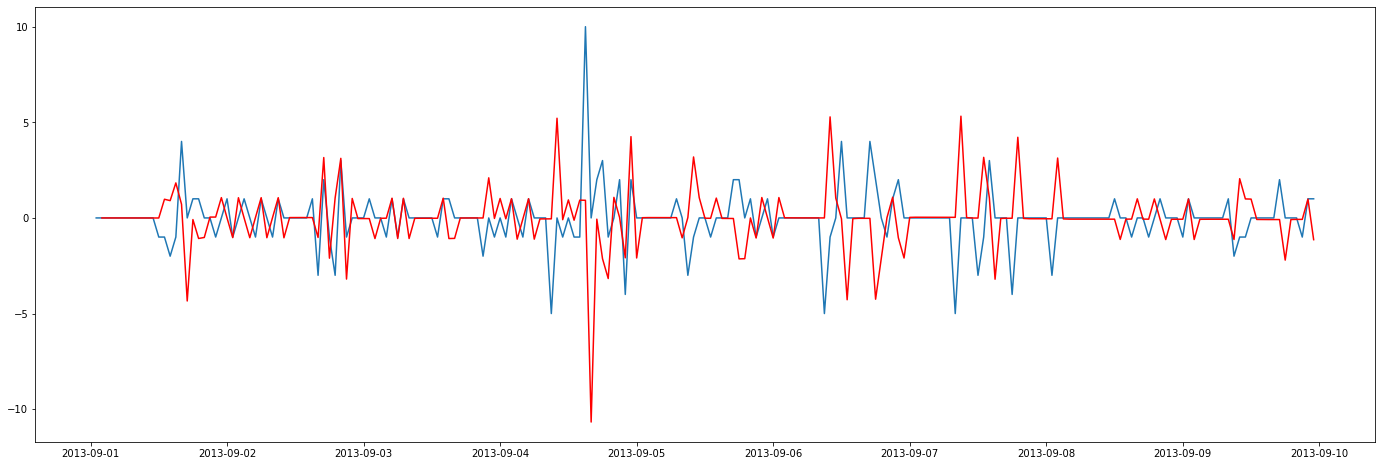

In [57]:
model = ARIMA(status_date_bike_diff, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.figure(figsize=(24,8))
plt.plot(status_date_bike_diff)
plt.plot(results_MA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\pytho\anaconda3\envs\py-test\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA unti

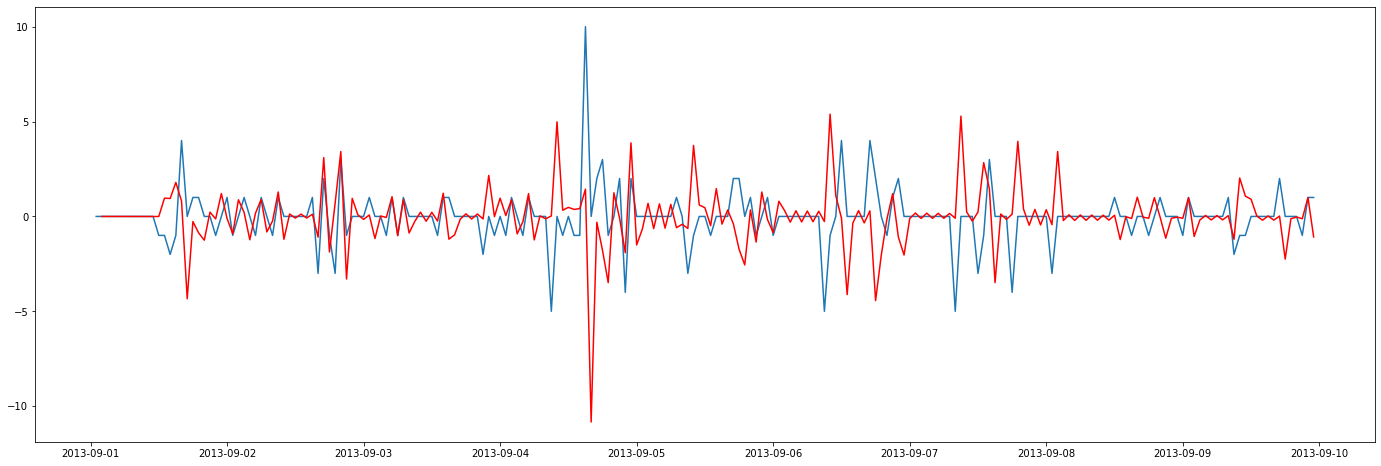

In [58]:
model = ARIMA(status_date_bike_diff, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.figure(figsize=(24,8))
plt.plot(status_date_bike_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [59]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

date
2013-09-01 02:00:00   -0.000493
2013-09-01 03:00:00   -0.000744
2013-09-01 04:00:00   -0.001039
2013-09-01 05:00:00   -0.001268
2013-09-01 06:00:00   -0.001582
dtype: float64


In [60]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2013-09-01 02:00:00   -0.000493
2013-09-01 03:00:00   -0.001237
2013-09-01 04:00:00   -0.002276
2013-09-01 05:00:00   -0.003544
2013-09-01 06:00:00   -0.005126
dtype: float64


In [68]:
predictions_ARIMA_add = pd.Series(status_date_bike[0], index=status_date_bike_diff.index)
predictions_ARIMA_add = predictions_ARIMA_add.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_add.head()

date
2013-09-01 01:00:00    11.000000
2013-09-01 02:00:00    10.999507
2013-09-01 03:00:00    10.998763
2013-09-01 04:00:00    10.997724
2013-09-01 05:00:00    10.996456
dtype: float64

In [64]:
status_date_bike_diff

date
2013-09-01 01:00:00    0.0
2013-09-01 02:00:00    0.0
2013-09-01 03:00:00    0.0
2013-09-01 04:00:00    0.0
2013-09-01 05:00:00    0.0
                      ... 
2013-09-09 19:00:00    0.0
2013-09-09 20:00:00    0.0
2013-09-09 21:00:00   -1.0
2013-09-09 22:00:00    1.0
2013-09-09 23:00:00    1.0
Name: bikes_available, Length: 215, dtype: float64

In [65]:
status_date_bike_diff[0]

0.0

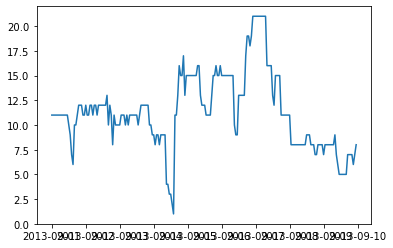

In [73]:
predictions_ARIMA = np.exp(predictions_ARIMA_add)
#plt.figure(figsize=(24,8))
plt.plot(status_date_bike)
#plt.plot(predictions_ARIMA)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

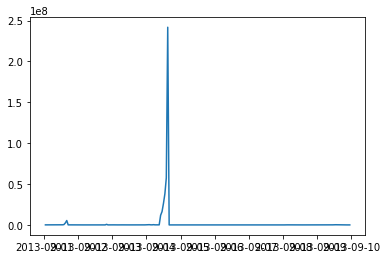

In [79]:
#plt.plot(predictions_ARIMA_add)
plt.plot(predictions_ARIMA)